## Unsupervised Learning: Clustering


Unsupervised learning is about what we can learn without labels.

Let's load the iris data again, but ignore the labels.

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
y = iris.target
x2d = iris.data[:, 2:4]

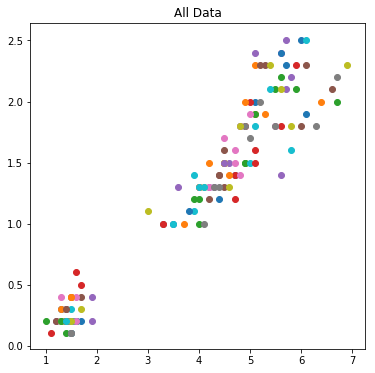

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
for point in x2d:
    plt.scatter(point[0], point[1])
    plt.autoscale()
    plt.grid()
plt.title('All Data')
plt.show()

It's clear when we project it from this perspective that there are at least two clusters.

We can find the center of these clusters automatically using an algorithm called k-means. For a great visualization of what k-means is doing behind the scenes check out [K-Means clustering demo](http://www.naftaliharris.com/blog/visualizing-k-means-clustering/).

In [3]:
from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(x2d)

print y
print kmeans.labels_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]


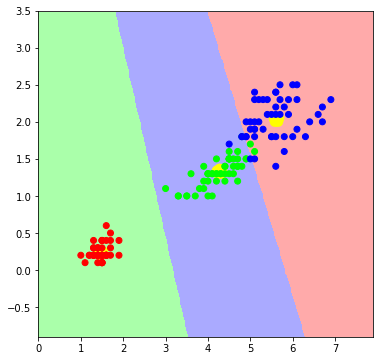

In [4]:
import numpy as np
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
h = .02

x_min, x_max = x2d[:, 0].min() - 1, x2d[:, 0].max() + 1
y_min, y_max = x2d[:, 1].min() - 1, x2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

centroids = kmeans.cluster_centers_

plt.figure(figsize=(6,6))
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.pcolormesh(xx, yy, z, cmap=cmap_light)
plt.scatter(centroids[:,0],centroids[:,1], color='yellow', marker='*',linewidths=10)
plt.scatter(x2d[:,0], x2d[:,1], c=y, cmap=cmap_bold)

### Application: dominant color extraction from an image.

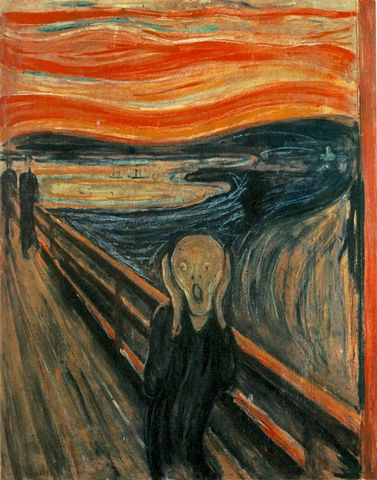

In [5]:
from PIL import Image
image = Image.open('scream.jpg').convert('RGB')
image

In [6]:
image_array = np.array(image).astype(np.float32) / 255.
print image_array.shape

(480, 377, 3)


The image was loaded in (480, 377, 3) size. Note that the first dimension (480) is bigger than the second dimension (377). This is because the data is in the order: (rows, columns, channels).

Scikit-learn algorithms take data where each item is in the format (number of observations, number of features), so let's convert it to that format.

In [7]:
h, w, d = original_shape = tuple(image_array.shape)
rgb = np.reshape(image_array, (w * h, d))
print rgb.shape

(180960, 3)


In [8]:
kmeans_color = cluster.KMeans(init='k-means++', n_clusters=10)
%time kmeans_color.fit(rgb)

CPU times: user 6.51 s, sys: 2.99 s, total: 9.5 s
Wall time: 6.38 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
dominant_colors = kmeans_color.cluster_centers_
print dominant_colors.shape

(10, 3)


Ok, we got ten points which represent dominant colors. Let's visualize them.

(1, 10, 3)


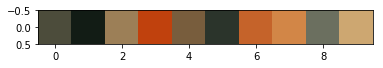

In [10]:
dominant_colors_img = np.reshape(dominant_colors, (1, dominant_colors.shape[0], dominant_colors.shape[1]))
print dominant_colors_img.shape
plt.imshow(dominant_colors_img, interpolation='nearest')

There are many clustering algorithms, the others can be found [here](http://scikit-learn.org/stable/modules/clustering.html)

![](http://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png)